# NEUR 3002 Project Part 2

<b>Group 4:</b> Aiden Browne, Azeh Ndifor, Diana Sethna, Jyotleen DeWal, Shivani Virani, Zeynap Uzun

<i>This is an italics markdown!</i>

<u>This is an underlined markdown!</u>

<b>This is a bold markdown!</b>

Here is a link to an article about I&F models: https://pubmed.ncbi.nlm.nih.gov/16622699/ 

The Integrate and Fire (IF) Model is a simple representation of how neurons respond to signals. The neuron’s membrane potential increases as it receives input and keeps rising until it hits a threshold. When the threshold is reached, the neuron "fires" (produces a spike), and the potential resets to start over. The model focuses on basic neuron behavior, like how the membrane potential changes and when spikes occur, without including complex details like potential decay. The model also does not account for leakage of current across the membrane. 

<b> Below is the code for the IF model <b>

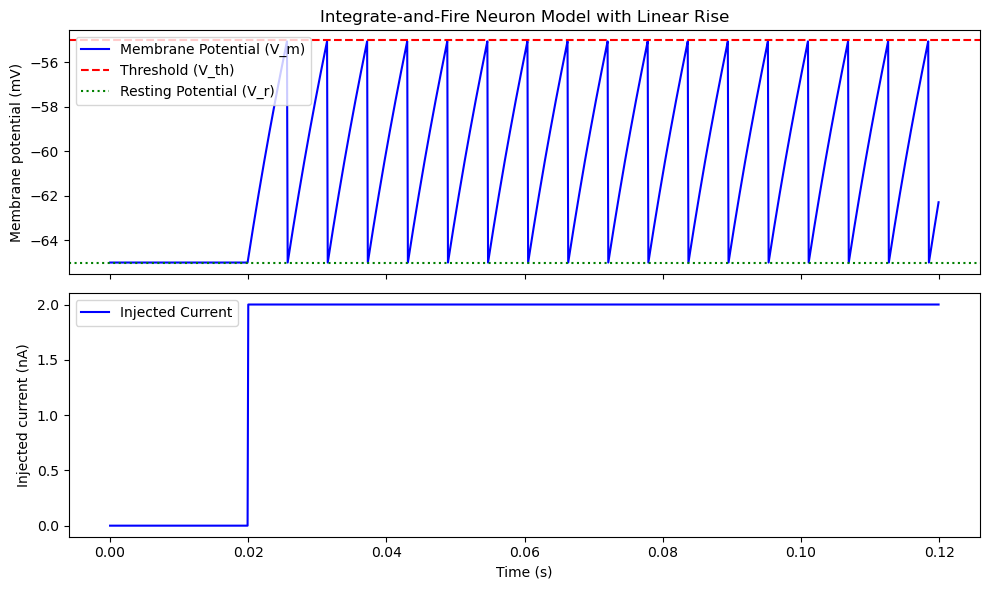

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.0001  # Time step (s)
T = 0.12     # Total simulation time (s)
time = np.arange(0, T, dt)

# Model parameters
V_rest = -65  # Resting potential (mV)
V_th = -55    # Threshold potential (mV)
V_reset = -65 # Reset potential (mV)
R_m = 10      # Membrane resistance (MOhm)
tau_m = 10e-3 # Membrane time constant (s)

# Input current (step current)
I_injected = np.zeros_like(time)
I_injected[int(0.02 / dt):] = 2.0  # Current of 2 nA applied after 20 ms

# Initialize membrane potential
V_m = np.ones_like(time) * V_rest
spikes = []

# Simulate the neuron
for t in range(1, len(time)):
    if V_m[t-1] >= V_th:
        V_m[t-1] = V_reset  # Reset after spike
        spikes.append(time[t-1])
    
    # Modified update rule for a more linear rise
    dV = ((V_rest - V_m[t-1]) + R_m * I_injected[t]) / tau_m * dt
    V_m[t] = V_m[t-1] + dV * 0.5 + 0.5 * (R_m * I_injected[t] * dt / tau_m)  # Adjusting for more linear rise

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential (V_m)", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (V_th)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (V_r)")
axes[0].set_ylabel("Membrane potential (mV)")
axes[0].legend()
axes[0].set_title("Integrate-and-Fire Neuron Model with Linear Rise")

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="blue")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Injected current (nA)")
axes[1].legend()

plt.tight_layout()
plt.show()


1. The Integrate and Fire (IF) model is a simple way to mimic how neurons work. However, it differs from real neurons by missing key features like leaky ion channels that allow ions to flow across the membrane constantly. Real neurons also have membrane potential decay and adapt over time, which the basic IF model does not include. Despite these differences, the model captures essential neuron behaviors like firing when a threshold is reached and resetting after a spike. 

2. The most challenging aspect of this homework was that our code did not produce a visualization that we liked. We had to utilize different prompts in our AI along with simultaneously putting the same prompts in multiple times in order to get a code that we liked.

3. This homework took about 30 minutes to do as a team. 


# NEUR 3002 Project Part 3

The Leaky Integrate and Fire (LIF) and Hodgkin-Huxley (HH) models are more reflective of biological neurons compared to the simple Integrate and Fire (IF) model. In addition to integrating incoming inputs to approach threshold, the LIF model takes into consideration leaky ion channels that purely linear IF models do not. With the integration of leaky channels, the LIF models accurately demonstrate that following the peak of a transient graded potential, the membrane potential decays gradually. 

However, the LIF model has several limitations. After reaching threshold, the model resets without firing an action potential, even if threshold is crossed in reality. This is due to a lack of voltage-gated channels. Instead, an external artificial spike generator is required to model action potentials. 

The HH model is most complex and biologically representative among the present models. Voltage-gated sodium and potassium channels are added to model transient electrical signals that reach threshold and generate action potentials. The HH model also has limitations, as like the other models, it assumes the morphological structures of a neuron are uniform. 

<b>Below is the code for the HH model.<b>

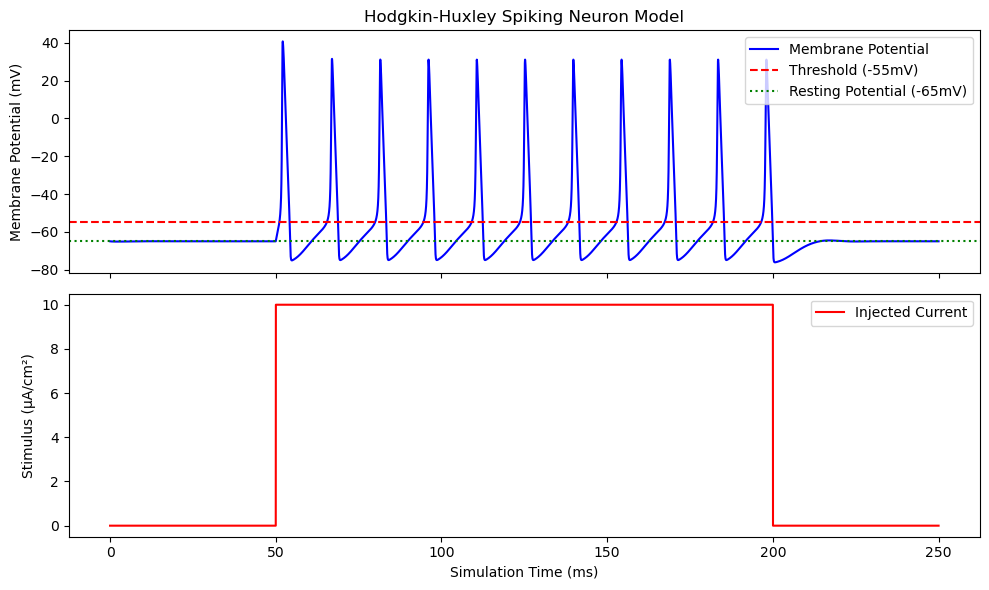

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.01  # Time step (ms)
T = 250     # Total simulation time (ms)
time = np.arange(0, T, dt)

# Hodgkin-Huxley Model Parameters
Cm = 1.0   # Membrane capacitance (uF/cm^2)
V_rest = -65  # Resting potential (mV)

# Maximal conductances (mS/cm^2)
G_Na = 120  # Sodium
G_K = 36    # Potassium
G_L = 0.3   # Leak

# Reversal potentials (mV)
E_Na = 50   # Sodium
E_K = -77   # Potassium
E_L = -54.4 # Leak

# Injected current (step current)
I_injected = np.zeros_like(time)
I_injected[int(50 / dt):int(200 / dt)] = 10  # Current applied between 50ms and 200ms

# Gating variables and voltage initialization
V_m = np.ones_like(time) * V_rest
m = 0.05  # Sodium activation gate
h = 0.6   # Sodium inactivation gate
n = 0.32  # Potassium activation gate

def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Simulation loop
for t in range(1, len(time)):
    m += dt * (alpha_m(V_m[t-1]) * (1 - m) - beta_m(V_m[t-1]) * m)
    h += dt * (alpha_h(V_m[t-1]) * (1 - h) - beta_h(V_m[t-1]) * h)
    n += dt * (alpha_n(V_m[t-1]) * (1 - n) - beta_n(V_m[t-1]) * n)
    
    I_Na = G_Na * (m**3) * h * (V_m[t-1] - E_Na)
    I_K = G_K * (n**4) * (V_m[t-1] - E_K)
    I_L = G_L * (V_m[t-1] - E_L)
    
    dV = (I_injected[t] - I_Na - I_K - I_L) / Cm * dt
    V_m[t] = V_m[t-1] + dV

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot membrane potential
axes[0].plot(time, V_m, label="Membrane Potential", color="blue")
axes[0].axhline(V_th, color="red", linestyle="--", label="Threshold (-55mV)")
axes[0].axhline(V_rest, color="green", linestyle=":", label="Resting Potential (-65mV)")
axes[0].set_ylabel("Membrane Potential (mV)")
axes[0].set_title("Hodgkin-Huxley Spiking Neuron Model")
axes[0].legend()

# Plot input current
axes[1].plot(time, I_injected, label="Injected Current", color="red")
axes[1].set_xlabel("Simulation Time (ms)")
axes[1].set_ylabel("Stimulus (μA/cm²)")
axes[1].legend()

plt.tight_layout()
plt.show()


1. The changes we had to make to the model was making it "biologically relevant." Our original code only gave us a spike model with no threshold, therefore we had to add that ourselves. We had to do this in order to make the Hodgkin-Huxley model work for the parameters for the assignment.
2. In order to make the model "biologically relevant," we added a section to our ChatGPT code that took the information from the assignment from Canvas. We included our ChatGPT prompt to say "The x and y-axis should be labeled and should reflect standard mV values. For example, -55mV should be threshold and -65 or -70mV should be resting potential." This addition added a dashed line at those mV values and helped us complete our code. We ensured that the HH model has the ability to fire action potentials due to added VGSCs and VGKCs, unlike our previous model.
3. Shannon’s entropy:
A mathematical measure that quantifies the amount of information contained within a message or random variable 
Represents the level of uncertainty associated with possible outcomes of a system
Higher entropy indicates a greater uncertainty and potential information content
Bit:
The unit of measure that predicts uncertainty or surprise
Quantifies questions
More bits = greater clarity
The greater the shannon’s entropy indicates a greater uncertainty, which requires more bits
The Hodgin-Huxley has the greatest Shannon's entropy and bits. This is because the HH model has to encode for spike generator and voltage gated ion channels.

In Part 2 of the homework, we struggled the most with understanding how GitHub works. For this part of the homework, we continued to face challenges, particularly in determining which file from JupyterLabs needed to be uploaded to GitHub.  One key realization we had was that in order to verify if the document had transferred properly, a group member needed to download the correct file, rather than relying on the README document from the ZIP file. This helped us avoid confusion and ensure that we were accessing the intended work. We believe we are gradually becoming more familiar with GitHub. 